<a href="https://colab.research.google.com/github/melbanna3/Data-Classification/blob/main/Data_Classification_AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt


def plot_grid(meanScores, classifier, xlabel, range):
    plt.figure(figsize=(10, 10))
    plt.plot(range, meanScores)
    plt.xlim(range[0], range[-1])
    plt.title(classifier)
    plt.xlabel(xlabel)
    plt.ylabel('Fitting Scores')
    plt.show()


def calculate_results(y_test, predicted, classifier):
    misplaced = 0
    for i in range(0, len(y_test)):
        if predicted[i] != y_test[i]:
            misplaced += 1
    labels = ['g', 'h']
    confM = confusion_matrix(y_test, predicted, labels=labels)
    test_accuracy = accuracy_score(y_test, predicted) * 100
    report = classification_report(y_test, predicted, labels=labels)
    print('\n' + classifier + " Misplaced Labels for our testing dataset: ", misplaced)
    print(classifier + " Accuracy for our testing dataset: {:.2f}%".format(test_accuracy))
    print(classifier + " Confusion Matrix for our testing dataset:")
    print('\t\t   Actual g\tActual h')
    print('Predicted g\t' + str(confM[0, 0]) + '\t' + str(confM[0, 1]))
    print('Predicted h\t' + str(confM[1, 0]) + '\t\t' + str(confM[1, 1]))
    print(classifier + " Report (F-measure,Recall,Precision) for our testing dataset:\n", report)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def random_forest(x_train, y_train, x_test, y_test):
    randf = RandomForestClassifier()
    n_estimators = list(range(1, 101))
    param_grid = dict(n_estimators=n_estimators)
    grid = GridSearchCV(randf, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search = grid.fit(x_train, y_train)
    best = grid_search.best_estimator_.get_params()['n_estimators']
    meanScores = grid_search.cv_results_['mean_test_score']
    print('Best n_estimators after tuning:', best)
    print("Best: with acc %f using %s-estimators" % (grid_search.best_score_, best))
    randf = RandomForestClassifier(n_estimators=best)
    randf.fit(x_train, y_train)
    predicted = randf.predict(x_test)
    plot_grid(meanScores, 'Random Forest', 'N Estimators', n_estimators)
    calculate_results(y_test, predicted, 'Random Forest')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def k_n_n(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier()
    k_range = list(range(1, 101))
    param_grid = dict(n_neighbors=k_range)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search = grid.fit(x_train, y_train)
    best = grid_search.best_estimator_.get_params()['n_neighbors']
    meanScores = grid_search.cv_results_['mean_test_score']
    print('Best k_neighbors after tuning:', best)
    print("Best: with acc %f using %s-neighbors" % (grid_search.best_score_, best))
    knn = KNeighborsClassifier(n_neighbors=best)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    plot_grid(meanScores, 'K-Nearest Neighbor', 'N Neighbors', k_range)
    calculate_results(y_test, predicted, 'K-Nearest Neighbor')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


def ada_boost(x_train, y_train, x_test, y_test):
    adb = AdaBoostClassifier()
    n_estimators = list(range(101, 501,20))
    param_grid = dict(n_estimators=n_estimators)
    grid = GridSearchCV(adb, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search = grid.fit(x_train, y_train)
    best = grid_search.best_estimator_.get_params()['n_estimators']
    meanScores = grid_search.cv_results_['mean_test_score']
    print('Best n_estimators after tuning:', best)
    print("Best: with acc %f using %s-estimators" % (grid_search.best_score_, best))
    adb = AdaBoostClassifier(n_estimators=best)
    adb.fit(x_train, y_train)
    predicted = adb.predict(x_test)
    plot_grid(meanScores, 'Adaboost', 'N Estimators', n_estimators)
    calculate_results(y_test, predicted, 'Adaboost')


In [ ]:
from sklearn.tree import DecisionTreeClassifier


def decision_tree(x_train, y_train, x_test, y_test):
    dtree = DecisionTreeClassifier()
    predicted = dtree.fit(x_train, y_train).predict(x_test)
    calculate_results(y_test, predicted, 'Decision Tree')



In [ ]:
from sklearn.naive_bayes import GaussianNB


def naive_bayes(x_train, y_train, x_test, y_test):
    gnb = GaussianNB()
    predicted = gnb.fit(x_train, y_train).predict(x_test)
    calculate_results(y_test, predicted, 'Naive Bayes')


In [ ]:
import numpy as np

import time


def read_from_file():
    A = np.zeros((6688 * 2, 10))
    B = []
    C = []
    f = open("/content/drive/MyDrive/magic04.data", "r")
    content = f.readlines()
    for i in range(0, 6688):
        a = content[i].split(',')
        b = content[i + 12332].split(',')
        for j in range(0, 10):
            A[i, j] = a[j]
            A[i + 6688, j] = b[j]
        B.append('g')
        C.append('h')
    B = [*B, *C]
    return A, B


def split_data(A, B):
    tr = np.zeros((9363, 10))
    te = np.zeros((4013, 10))
    trlabel = []
    telabel = []
    ind1b = 0
    ind2b = 0
    for j in range(0, 6688 * 2):
        i = (j % 10) + 1
        if i % 3 == 0:
            te[ind2b, :] = A[j, :]
            telabel.append(B[j])
            ind2b = ind2b + 1
        else:
            tr[ind1b, :] = A[j, :]
            trlabel.append(B[j])
            ind1b = ind1b + 1
    return tr, trlabel, te, telabel


In [ ]:
A, B = read_from_file()
tr, trlabel, te, telabel = split_data(A, B)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best k_neighbors after tuning: 15
Best: with acc 0.768449 using 15-neighbors


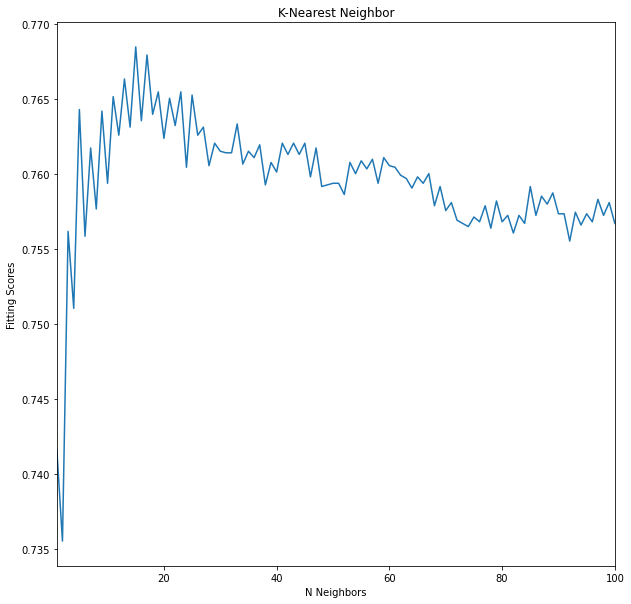


K-Nearest Neighbor Misplaced Labels for our testing dataset:  919
K-Nearest Neighbor Accuracy for our testing dataset: 77.10%
K-Nearest Neighbor Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1738	268
Predicted h	651		1356
K-Nearest Neighbor Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.73      0.87      0.79      2006
           h       0.83      0.68      0.75      2007

    accuracy                           0.77      4013
   macro avg       0.78      0.77      0.77      4013
weighted avg       0.78      0.77      0.77      4013

Running Time :  99.56080794334412


In [ ]:
t = time.time()
k_n_n(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best n_estimators after tuning: 91
Best: with acc 0.823987 using 91-estimators


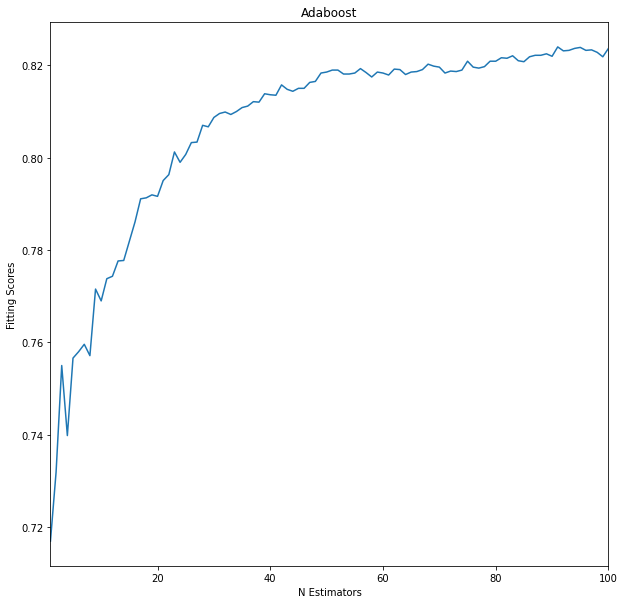


Adaboost Misplaced Labels for our testing dataset:  715
Adaboost Accuracy for our testing dataset: 82.18%
Adaboost Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1664	342
Predicted h	373		1634
Adaboost Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.82      0.83      0.82      2006
           h       0.83      0.81      0.82      2007

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013

Running Time :  915.4751114845276


In [ ]:
t = time.time()
ada_boost(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best n_estimators after tuning: 441
Best: with acc 0.826444 using 441-estimators


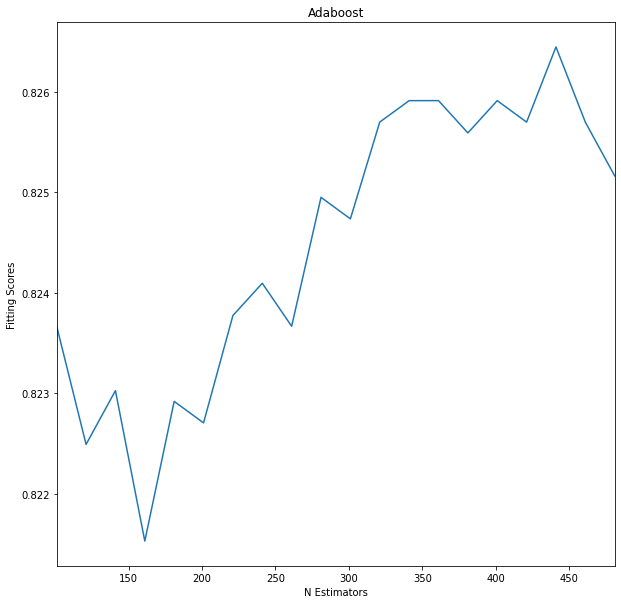


Adaboost Misplaced Labels for our testing dataset:  730
Adaboost Accuracy for our testing dataset: 81.81%
Adaboost Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1666	340
Predicted h	390		1617
Adaboost Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.81      0.83      0.82      2006
           h       0.83      0.81      0.82      2007

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013

Running Time :  1009.8859593868256


In [ ]:
t = time.time()
ada_boost(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best n_estimators after tuning: 99
Best: with acc 0.858164 using 99-estimators


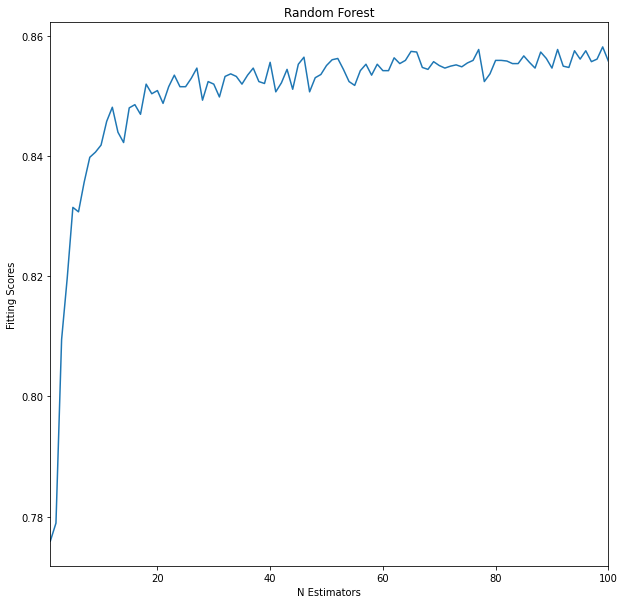


Random Forest Misplaced Labels for our testing dataset:  576
Random Forest Accuracy for our testing dataset: 85.65%
Random Forest Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1771	235
Predicted h	341		1666
Random Forest Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.84      0.88      0.86      2006
           h       0.88      0.83      0.85      2007

    accuracy                           0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013

Running Time :  1388.3461196422577


In [ ]:
t = time.time()
random_forest(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best n_estimators after tuning: 301
Best: with acc 0.859553 using 301-estimators


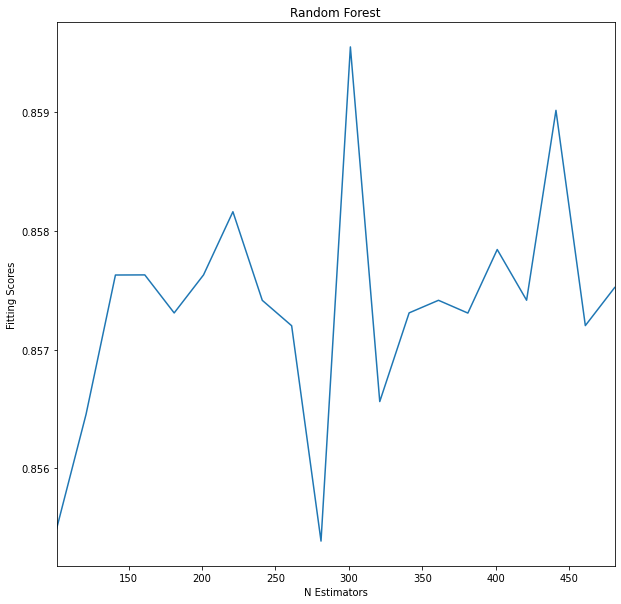


Random Forest Misplaced Labels for our testing dataset:  592
Random Forest Accuracy for our testing dataset: 85.25%
Random Forest Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1761	245
Predicted h	347		1660
Random Forest Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.84      0.88      0.86      2006
           h       0.87      0.83      0.85      2007

    accuracy                           0.85      4013
   macro avg       0.85      0.85      0.85      4013
weighted avg       0.85      0.85      0.85      4013

Running Time :  1603.2296750545502


In [ ]:
t = time.time()
random_forest(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)

In [ ]:
t = time.time()
naive_bayes(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)


Naive Bayes Misplaced Labels for our testing dataset:  1433
Naive Bayes Accuracy for our testing dataset: 64.29%
Naive Bayes Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1775	231
Predicted h	1202		805
Naive Bayes Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.60      0.88      0.71      2006
           h       0.78      0.40      0.53      2007

    accuracy                           0.64      4013
   macro avg       0.69      0.64      0.62      4013
weighted avg       0.69      0.64      0.62      4013

Running Time :  0.055501699447631836


In [ ]:
t = time.time()
decision_tree(tr, trlabel, te, telabel)
print('Running Time : ', time.time() - t)


Decision Tree Misplaced Labels for our testing dataset:  829
Decision Tree Accuracy for our testing dataset: 79.34%
Decision Tree Confusion Matrix for our testing dataset:
		   Actual g	Actual h
Predicted g	1611	395
Predicted h	434		1573
Decision Tree Report (F-measure,Recall,Precision) for our testing dataset:
               precision    recall  f1-score   support

           g       0.79      0.80      0.80      2006
           h       0.80      0.78      0.79      2007

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013

Running Time :  0.1981360912322998


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


# 1- download dataset
# 2- create data loader
# 3- build model
# 4- train
# 5- save trained model


BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 0.001


class FeedForwardNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.dense_layers = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.flatten(input_data)
        logits = self.dense_layers(x)
        predictions = self.softmax(logits)
        return predictions


def download_mnist_datasets():
    train_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
    )
    validation_data = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )
    return train_data, validation_data


def create_data_loader(train_data, batch_size):
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    return train_dataloader


def train_single_epoch(model, data_loader, loss_fn, optimiser, device):
    for input, target in data_loader:
        input, target = input.to(device), target.to(device)

        # calculate loss
        prediction = model(input)
        loss = loss_fn(prediction, target)

        # backpropagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    print(f"loss: {loss.item()}")


def train(model, data_loader, loss_fn, optimiser, device, epochs):
    for i in range(epochs):
        print(f"Epoch {i+1}")
        train_single_epoch(model, data_loader, loss_fn, optimiser, device)
        print("---------------------------")
    print("Finished training")


if __name__ == "__main__":

    # download data and create data loader
    train_data, _ = download_mnist_datasets()
    print(train_data)
    # train_dataloader = create_data_loader(train_data, BATCH_SIZE)
    #
    # # construct model and assign it to device
    # if torch.cuda.is_available():
    #     device = "cuda"
    # else:
    #     device = "cpu"
    # print(f"Using {device}")
    # feed_forward_net = FeedForwardNet().to(device)
    # print(feed_forward_net)
    #
    # # initialise loss funtion + optimiser
    # loss_fn = nn.CrossEntropyLoss()
    # optimiser = torch.optim.Adam(feed_forward_net.parameters(),
    #                              lr=LEARNING_RATE)
    #
    # # train model
    # train(feed_forward_net, train_dataloader, loss_fn, optimiser, device, EPOCHS)
    #
    # # save model
    # torch.save(feed_forward_net.state_dict(), "feedforwardnet.pth")
    # print("Trained feed forward net saved at feedforwardnet.pth")

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


------Device Used For Training------
cpu
------------------------------------
---------------------Model Details----------------------
BinaryClassification(
  (layer_1): Linear(in_features=10, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
--------------------------------------------------------
--------------Start Training------------
Epoch 001: | Loss: 0.45030 | Acc: 77.959
Epoch 002: | Loss: 0.38666 | Acc: 82.102
Epoch 003: | Loss: 0.36779 | Acc: 83.395
Epoch 004: | Lo

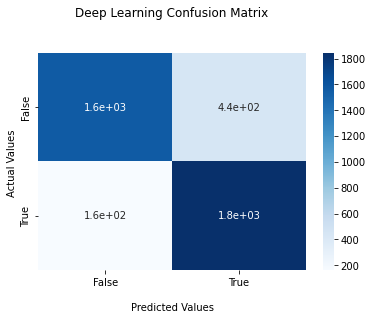

-------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


#-------------------Reading Data------------------------------
def read_from_file():
    A = np.zeros((6688 * 2, 10))
    B = []
    C = []
    f = open("/content/drive/MyDrive/magic04.data", "r")
    content = f.readlines()
    for i in range(0, 6688):
        a = content[i].split(',')
        b = content[i + 12332].split(',')
        for j in range(0, 10):
            A[i, j] = a[j]
            A[i + 6688, j] = b[j]
        B.append(1)
        C.append(0)
    B = [*B, *C]
    return A, B


def split_data(A, B):
    tr = np.zeros((9363, 10))
    te = np.zeros((4013, 10))
    trlabel = []
    telabel = []
    ind1b = 0
    ind2b = 0
    for j in range(0, 6688 * 2):
        i = (j % 10) + 1
        if i % 3 == 0:
            te[ind2b, :] = A[j, :]
            telabel.append(B[j])
            ind2b = ind2b + 1
        else:
            tr[ind1b, :] = A[j, :]
            trlabel.append(B[j])
            ind1b = ind1b + 1
    return tr, trlabel, te, telabel

A, B = read_from_file()
X_train , y_train , X_test , y_test = split_data(A, B)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#----------Setting some Hyperparameters-----------------
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001


#--------------- train data-----------------------------
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))

#----------------------test data------------------------
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))


#--------------Initializing Dataloaders---------------
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)



#--------------Defining Neural Network----------------
class BinaryClassification(nn.Module):
    
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 10.

        #To Edit the Size of hidden layers
        hidden_layers1 = 32
        hidden_layers2 = 64
        #----------------------------------


        self.layer_1 = nn.Linear(10, hidden_layers1) 

        
        self.layer_2 = nn.Linear(hidden_layers1, hidden_layers2) ##**

        #--> 2nd hidden layer
        # self.layer_3 = nn.Linear(hidden_layers2, hidden_layers2)

        self.layer_out = nn.Linear(hidden_layers2, 1) ##**
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(hidden_layers1)
        self.batchnorm2 = nn.BatchNorm1d(hidden_layers2) ##**

        #--> 2nd hidden layer
        self.batchnorm3 = nn.BatchNorm1d(hidden_layers2)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        #--> 2nd hidden layer
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        #-----------------------
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

#------------------Check GPU Activation--------------
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('------Device Used For Training------')
print(device)
print('------------------------------------')


#----------------Initializing Model------------------
model = BinaryClassification()
model.to(device)
print('---------------------Model Details----------------------')
print(model)
print('--------------------------------------------------------')
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

#------------------Train The Model---------------------
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

model.train()

print('--------------Start Training------------')
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

print('----------------------------------------')

#----------------Testing the model------------------------
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]



print('----------------Classification Report---------------')
print(classification_report(y_test, y_pred_list))
print('----------------------------------------------------')

print('----------------Confusion Matrix-----------------')
cf_matrix = confusion_matrix(y_test, y_pred_list)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Deep Learning Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print('-------------------------------------------------')